# Time series model ARIMA

After EDA, apply the model

In [114]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [91]:
df = pd.read_excel("./data:processed/processed_data.xlsx")
df.tail()

,daily_sales,Sales_volume
631,2022-11-26,23049.15
632,2022-11-27,23013.38
633,2022-11-28,23062.31
634,2022-11-29,23031.58
635,2022-11-30,23012.49


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   daily_sales   636 non-null    datetime64[ns]
 1   Sales_volume  636 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.1 KB


In [93]:
df = df.set_index('daily_sales')

In [94]:
train = df[:'2022-10-31']
test  = df['2022-11-01':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (606, 1)
Test Dataset: (30, 1)


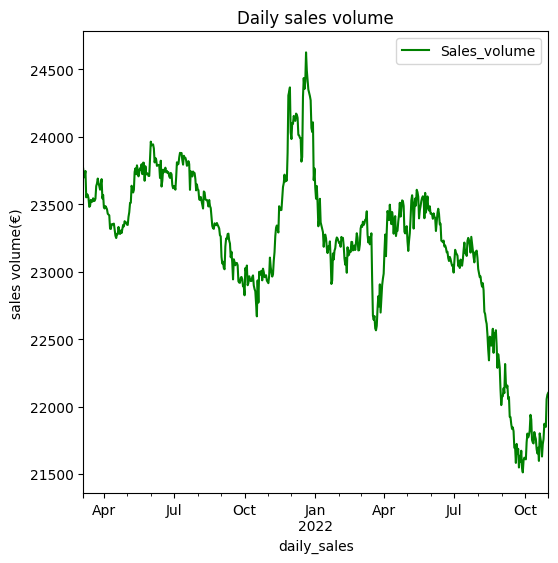

In [95]:
train.plot(style="-", c ='green', ylabel = 'sales volume(€)', title ='Daily sales volume');

<Figure size 700x300 with 0 Axes>

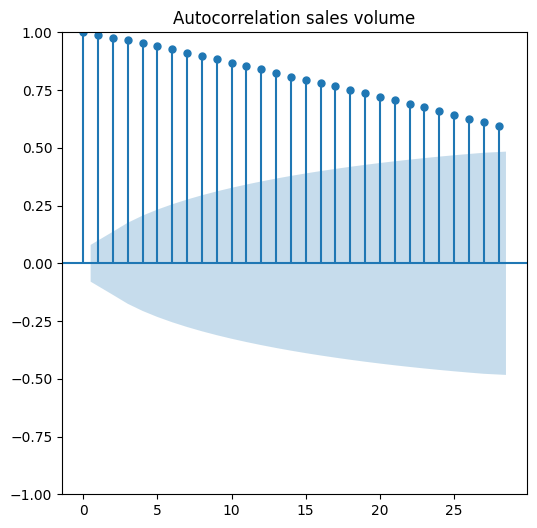

In [96]:
plt.figure(figsize=(7,3))
plot_acf(train, use_vlines= True, title= 'Autocorrelation sales volume');

/Users/liss/PyCharmDrafts/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


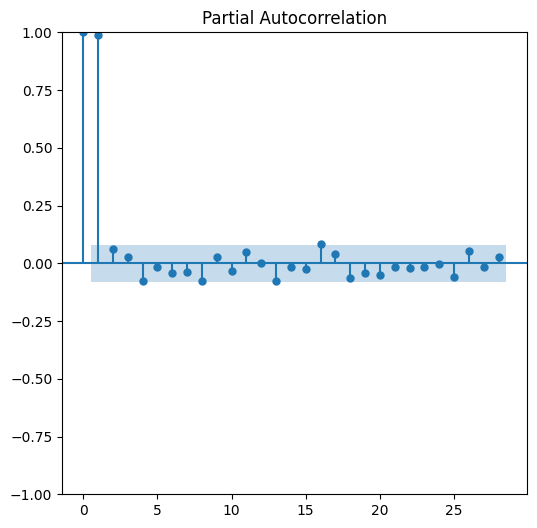

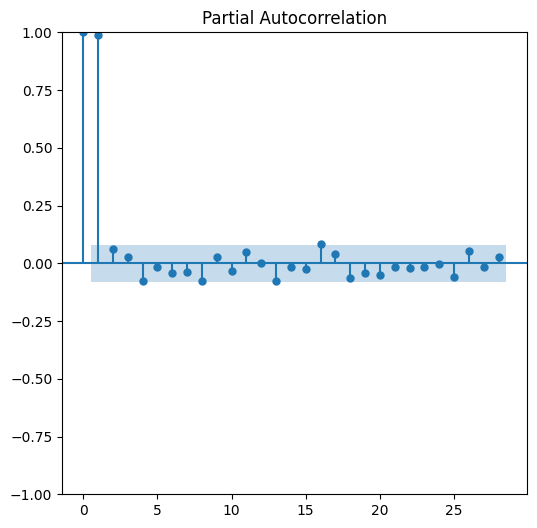

In [115]:
plot_pacf(train)

In [97]:
#is it estational?.. pvalue < 0.1, 0.05, 0.01
result = adfuller(train.Sales_volume.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# printing the critical values at different alpha levels.
print('critical values at 90%, 95%, and 99% confidence:')
for a, b in result[4].items():
    print('\t%s: %.3f' %(a, b))

ADF Statistic: -1.153348
p-value: 0.693336
critical values at 90%, 95%, and 99% confidence:
	1%: -3.441
	5%: -2.866
	10%: -2.569


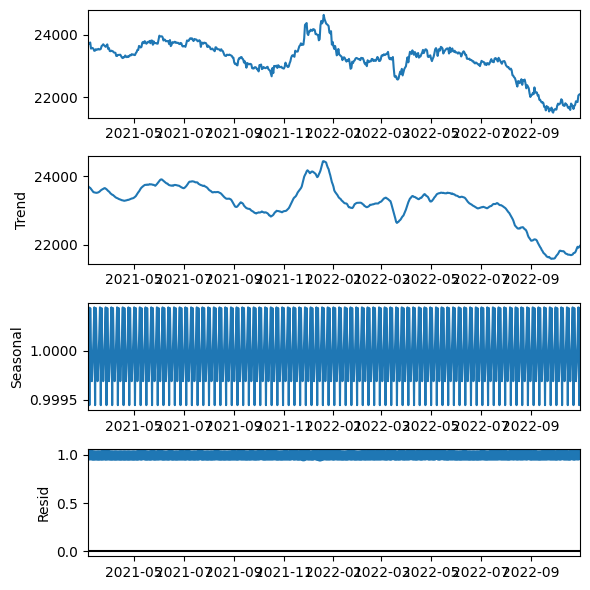

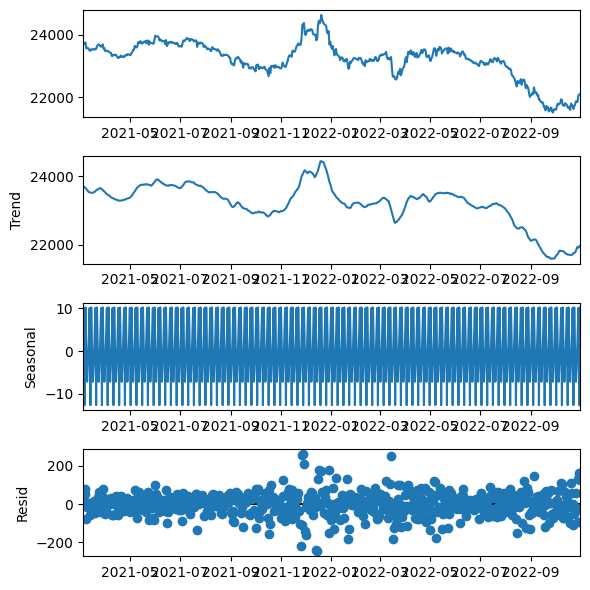

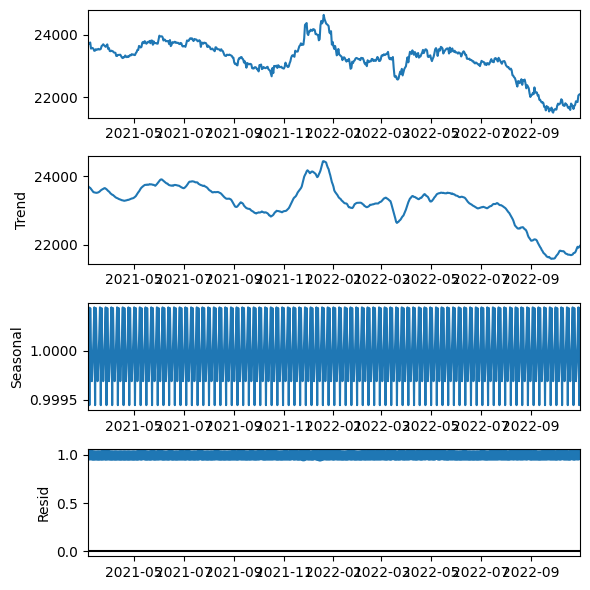

In [98]:
#from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result_a = seasonal_decompose(train, model='additive', extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (6,6)})
result_a.plot()

result_m = seasonal_decompose(train, model='multiplicative', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (6,6)})
result_m.plot()

# ARIMA MODEL

In [99]:

model_ARIMA = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_d = 3,
                   max_p = 3,
                   max_q = 3,
                   m=7,
                   error_action='ignore',
                   test="adf",
                   trace=True,
                   stepwise=True,
                   )
print(model_ARIMA.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=7069.198, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=7068.376, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=7066.252, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=7065.821, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7067.039, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=7066.261, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=7067.789, Time=0.21 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=7067.810, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=7065.853, Time=0.16 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=7069.790, Time=0.76 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=7067.667, Time=0.06 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=7067.201, Time=0.30 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept   : AIC=7066.552, Time=0.10 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=7066.232, Time=0.07 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept

In [100]:
model_ARIMA.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 7),
      suppress_warnings=True, with_intercept=False)

In [101]:
model_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  606
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 7)   Log Likelihood               -3529.254
Date:                           Mon, 05 Dec 2022   AIC                           7064.508
Time:                                   08:03:40   BIC                           7077.724
Sample:                               03-05-2021   HQIC                          7069.651
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0823      0.031     -2.677      0.007      -0.143      -0.022
ma.S.L7        0.0652      0.036      1.804      0.071      -0.006       0.136
sigma2      6836.6086    225.022     30.382      0.000    6395.573    7277.644
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               496.69
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
#the next 30 days
predictions_ARIMA= model_ARIMA.predict(n_periods = 30)
print(predictions_ARIMA)

2022-11-01    22102.233179
2022-11-02    22110.106413
2022-11-03    22108.062244
2022-11-04    22107.907488
2022-11-05    22121.447714
2022-11-06    22123.958231
2022-11-07    22124.453531
2022-11-08    22124.388187
2022-11-09    22124.388187
2022-11-10    22124.388187
2022-11-11    22124.388187
2022-11-12    22124.388187
2022-11-13    22124.388187
2022-11-14    22124.388187
2022-11-15    22124.388187
2022-11-16    22124.388187
2022-11-17    22124.388187
2022-11-18    22124.388187
2022-11-19    22124.388187
2022-11-20    22124.388187
2022-11-21    22124.388187
2022-11-22    22124.388187
2022-11-23    22124.388187
2022-11-24    22124.388187
2022-11-25    22124.388187
2022-11-26    22124.388187
2022-11-27    22124.388187
2022-11-28    22124.388187
2022-11-29    22124.388187
2022-11-30    22124.388187
Freq: D, dtype: float64


<AxesSubplot:xlabel='daily_sales'>

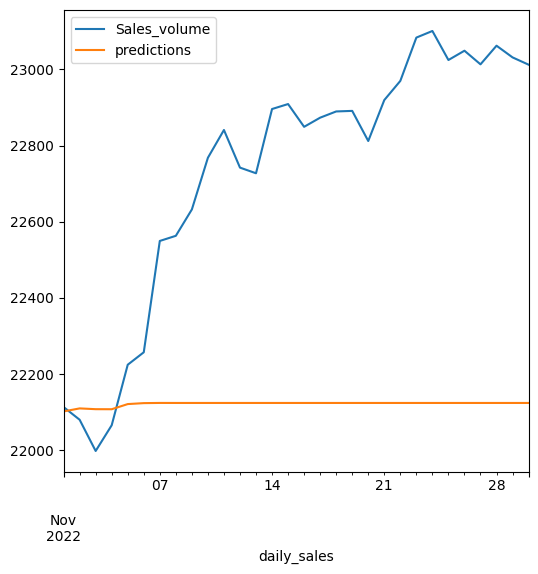

In [103]:
predictions_ARIMA = pd.DataFrame(predictions_ARIMA, index = test.index, columns = ['predictions'])
pd.concat([test,predictions_ARIMA],axis=1).plot()

<AxesSubplot:xlabel='daily_sales'>

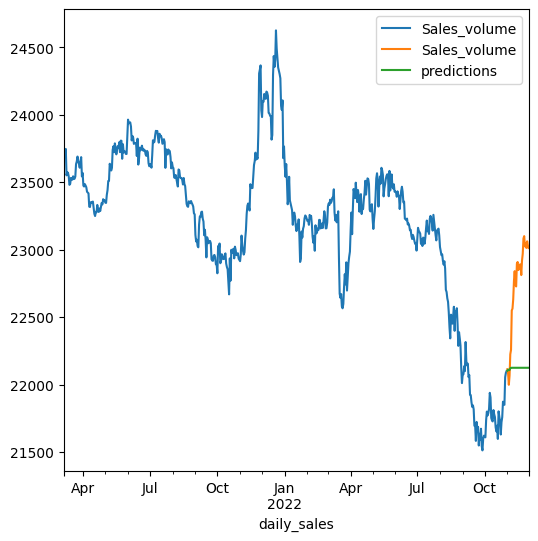

In [104]:
pd.concat([train,test,predictions_ARIMA],axis=1).plot()

# SARIMA MODEL

In [105]:
#strongly non stationary
#SARIMA because seasonality is set
#order of the seasonal differencing D
#m seasonality 7 daily, 12 monthly and 1 yearly
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_d = 3,
                   max_p = 3,
                   max_q = 3,
                   m=7,
                   D= 2,
                   error_action='ignore',
                   test="adf",
                   seasonal= True,
                   trace=True,
                   stepwise=True,
                   )
print(model.aic())

 ARIMA(2,0,0)(1,2,1)[7]             : AIC=inf, Time=1.55 sec
 ARIMA(3,0,0)(2,2,0)[7]             : AIC=7543.059, Time=0.93 sec
 ARIMA(3,0,0)(1,2,0)[7]             : AIC=7661.668, Time=0.52 sec
 ARIMA(3,0,0)(2,2,1)[7]             : AIC=inf, Time=3.90 sec
 ARIMA(3,0,0)(1,2,1)[7]             : AIC=inf, Time=0.85 sec
 ARIMA(3,0,1)(2,2,0)[7]             : AIC=7559.201, Time=2.01 sec
 ARIMA(2,0,1)(2,2,0)[7]             : AIC=7562.871, Time=1.66 sec
 ARIMA(3,0,0)(2,2,0)[7] intercept   : AIC=7545.016, Time=1.66 sec

Best model:  ARIMA(3,0,0)(2,2,0)[7]          
Total fit time: 20.902 seconds
7543.059116454064
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,2,1)[7]             : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(0,2,0)[7]             : AIC=8349.415, Time=0.04 sec
 ARIMA(1,0,0)(1,2,0)[7]             : AIC=7661.732, Time=0.19 sec
 ARIMA(0,0,1)(0,2,1)[7]             : AIC=inf, Time=0.47 sec
 ARIMA(1,0,0)(0,2,0)[7]             : AIC=7925.587, Time=0.06 sec
 ARIMA(1,0,0)(2,2,0)[7]     

In [106]:
#train the data
model.fit(train)

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(2, 2, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  606
Model:             SARIMAX(3, 0, 0)x(2, 2, 0, 7)   Log Likelihood               -3765.530
Date:                           Mon, 05 Dec 2022   AIC                           7543.059
Time:                                   08:04:01   BIC                           7569.360
Sample:                               03-05-2021   HQIC                          7553.304
                                    - 10-31-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7474      0.023     31.811      0.000       0.701       0.793
ar.L2         -0.0550      0.035     -1.561      0.119      -0.124       0.014
ar.L3          0.1303      0.022      5.963      0.000       0.087       0.173
ar.S.L7       -0.7995      0.018    -44.434      0.000      -0.835      -0.764
ar.S.L14      -0.3612      0.017    -20.862      0.000      -0.395      -0.327
sigma2      1.491e+04    609.548     24.460      0.000    1.37e+04    1.61e+04
===================================================================================
Ljung-Box (L1) (Q):                  13.32   Jarque-Bera (JB):                76.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.03
Prob(H) (two-sided):                  0.82   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
#predict the next 30 days
predictions, confident = model.predict(n_periods = 30, return_conf_int=True)

In [109]:
#see predictions
print(predictions)

2022-11-01    22045.298613
2022-11-02    22128.128568
2022-11-03    22108.322025
2022-11-04    22050.163072
2022-11-05    22216.985729
2022-11-06    22226.799589
2022-11-07    22301.103424
2022-11-08    22228.228318
2022-11-09    22349.377423
2022-11-10    22261.637483
2022-11-11    22192.946939
2022-11-12    22442.698527
2022-11-13    22488.456312
2022-11-14    22577.595205
2022-11-15    22452.345197
2022-11-16    22638.634253
2022-11-17    22451.558457
2022-11-18    22364.757728
2022-11-19    22698.937790
2022-11-20    22785.614924
2022-11-21    22873.571996
2022-11-22    22694.566891
2022-11-23    22897.444574
2022-11-24    22658.538174
2022-11-25    22542.753071
2022-11-26    22915.152209
2022-11-27    23016.561472
2022-11-28    23131.803950
2022-11-29    22912.101173
2022-11-30    23160.042408
Freq: D, dtype: float64


In [110]:
print("MSE:", mean_squared_error(test.values, predictions))
print("RMSE:", np.sqrt(mean_squared_error(test.values, predictions)))
print("MAE:", mean_absolute_error(test.values, predictions))

MSE: 84762.99775729116
RMSE: 291.14085552751123
MAE: 229.89971171422295


<AxesSubplot:xlabel='daily_sales'>

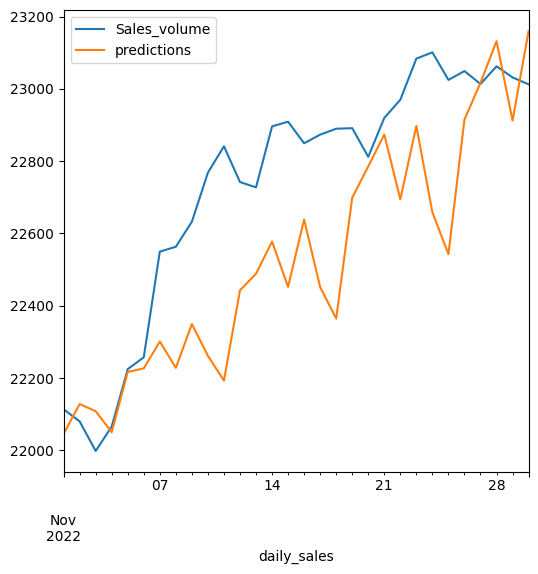

In [111]:
predictions = pd.DataFrame(predictions, index = test.index, columns = ['predictions'])
pd.concat([test,predictions],axis=1).plot()

<AxesSubplot:xlabel='daily_sales'>

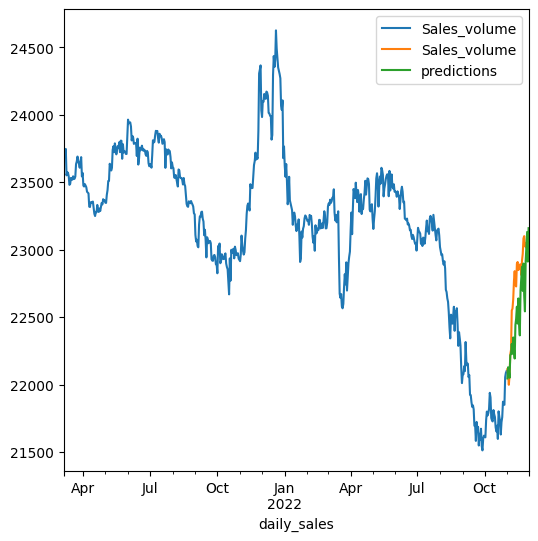

In [112]:
pd.concat([train,test,predictions],axis=1).plot()